In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Load data:

In [2]:
chosen_annotators = pd.read_csv('../data/folded_aggresion.csv')
aggression_annotations = pd.read_csv('../data/aggression_annotations.tsv', sep='\t')
aggression_comments = pd.read_csv('../data/aggression_annotated_comments.tsv', sep='\t')

Check the number of chosen annotators:

In [3]:
chosen_annotators = chosen_annotators.worker_id.unique()
len(chosen_annotators)

2450

Filter and merge with split info:

In [4]:
filtered_annotations = aggression_annotations.loc[aggression_annotations.worker_id.isin(chosen_annotators)]
filtered_annotations = filtered_annotations.merge(aggression_comments, on='rev_id')

## Entropy

In [5]:
entropy_df = filtered_annotations.groupby('rev_id').mean().aggression.reset_index()
count_df = filtered_annotations.groupby('rev_id').count().aggression.reset_index()
entropy_df.columns = ['rev_id', 'p_aggressive']
count_df.columns = ['rev_id', 'num_annotations']
entropy_df['entropy'] = entropy_df.p_aggressive.apply(lambda x: 0 if (x == 0 or x == 1) else 
                                                      - x * np.log2(x) - (1 - x) * np.log2(1 - x))
entropy_df = entropy_df.merge(count_df, on='rev_id')
entropy_df = entropy_df.merge(aggression_comments, on='rev_id')
entropy_df = entropy_df[['rev_id', 'p_aggressive', 'entropy', 'num_annotations', 'split']]

In [6]:
entropy_df = entropy_df.sort_values(by='entropy', ascending=False)

In [7]:
entropy_df

,rev_id,p_aggressive,entropy,num_annotations,split
107668,630648413,0.5,1.0,10,train
3360,23142982,0.5,1.0,10,dev
76844,386891548,0.5,1.0,6,train
49973,226719672,0.5,1.0,8,train
27334,118177029,0.5,1.0,26,test
...,...,...,...,...,...
50900,230923672,0.0,0.0,9,train
50898,230906115,0.0,0.0,8,train
50897,230899340,0.0,0.0,10,test
50895,230898107,0.0,0.0,14,train


Entropy distribution over the whole dataset:

[Text(0.5, 0, 'entropy'),
 Text(0, 0.5, 'number of comments'),
 Text(0.5, 1.0, 'Entropy distribution in the dataset')]

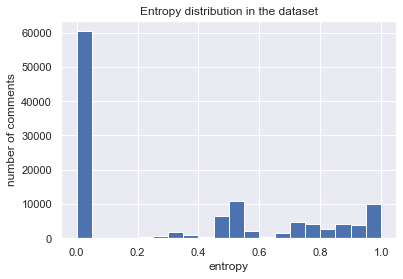

In [11]:
ax = entropy_df.entropy.hist(bins=20)
ax.set(xlabel='entropy', ylabel='number of comments', title='Entropy distribution in the dataset')

In [9]:
print(f"Number of examples with zero entropy: {len(entropy_df.loc[entropy_df.entropy == 0])}")
print(f"Number of examples with non-zero entropy: {len(entropy_df.loc[entropy_df.entropy > 0])}")

Number of examples with zero entropy: 60454
Number of examples with non-zero entropy: 55407


Entropy distribution over examples in the *dev* set:

[Text(0.5, 0, 'entropy'),
 Text(0, 0.5, 'number of comments'),
 Text(0.5, 1.0, 'Entropy distribution in the DEV set')]

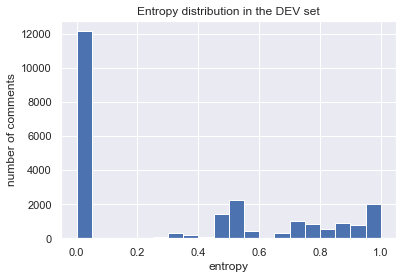

In [12]:
ax2 = entropy_df.loc[entropy_df.split == 'dev'].entropy.hist(bins=20)
ax2.set(xlabel='entropy', ylabel='number of comments', title='Entropy distribution in the DEV set')

In [14]:
print(f"Number of examples with zero entropy: {len(entropy_df.loc[np.logical_and(entropy_df.entropy == 0, entropy_df.split == 'dev')])}")
print(f"Number of examples with non-zero entropy: {len(entropy_df.loc[np.logical_and(entropy_df.entropy > 0, entropy_df.split == 'dev')])}")

Number of examples with zero entropy: 12143
Number of examples with non-zero entropy: 11017


## Annotations distribution

[Text(0.5, 0, 'number of annotations'),
 Text(0, 0.5, 'number of comments'),
 Text(0.5, 1.0, 'Annotations distribution in the DEV set')]

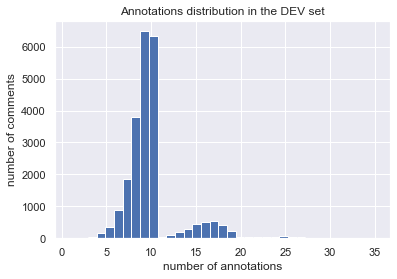

In [19]:
ax3 = entropy_df.loc[entropy_df.split == 'dev'].num_annotations.hist(bins=35)
ax3.set(xlabel='number of annotations', ylabel='number of comments', title='Annotations distribution in the DEV set')

In [20]:
entropy_df.to_csv('../data/entropy.csv', index=False)